# UCAS教评好帮手

In [1]:
import os
import re
import csv
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException

In [2]:
#####
# 参数#
#####
# 获取实例
def get_opt():
    parser = argparse.ArgumentParser(
        formatter_class=argparse.RawDescriptionHelpFormatter,
        description="""
                #############################
                # #   #   ###   ###    #### # 
                # #   #  #     #   #  #     # 
                # #   #  #     #####   ###  # 
                # #   #  #     #   #      # # 
                #  ###    ###  #   #  ####  # 
                #############################
        """,
        usage="%(prog)s -u <email> -p <password> -o <confirmation>",
        epilog="V wo wu shi, I want to eat crazy Thursday KFC",
    )
    # 解析命令行参数

    parser.add_argument("-v", "--version", action="version", version="%(prog)s 1.0")
    parser.add_argument("-u", "--username", type=str, help="邮箱", required=True)
    parser.add_argument("-p", "--password", type=str, help="密码", required=True)
    parser.add_argument("-o", "--ok", type=str, help="任意字符串确认", required=True)
    options = parser.parse_args()
    return options


def ini_browser():
    ###################
    # 隐藏由测试工具控制#
    ###################
    # options = webdriver.EdgeOptions()
    options = webdriver.ChromeOptions()
    user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36 Edg/121.0.0.0"
    # 添加试验性参数
    options.add_argument(f"user-agent={user_agent}")
    options.add_experimental_option("excludeSwitches", ["enable-automation"])
    options.add_experimental_option("useAutomationExtension", False)
    # 创建Chrome浏览器对象并传入参数
    # browser = webdriver.Edge(options=options)
    browser = webdriver.Chrome(options=options)
    # 执行Chrome开发者协议命令（在加载页面时执行指定的JavaScript代码）
    browser.execute_cdp_cmd(
        "Page.addScriptToEvaluateOnNewDocument",
        {
            "source": 'Object.defineProperty(navigator, "webdriver", {get: () => undefined})'
        },
    )
    return browser


def Login(browser, url, username, password):
    browser.get(url)
    username_input = browser.find_element(By.ID, "userName1")
    password_input = browser.find_element(By.ID, "pwd1")
    # 在输入框中输入内容
    username_input.send_keys(username)
    password_input.send_keys(password)
    print("请手动输入验证码并点击登录按钮......")


def evaluate_course(browser):
    time.sleep(3)
    # 客观题
    # 找到所有value为5的radio按钮

    Class_name = browser.find_element(
        By.XPATH, "/html/body/div[3]/div/div[2]/div[2]/p/strong"
    ).text
    print(f"评价{Class_name}ing.....")
    radio_buttons = browser.find_elements(
        By.XPATH, "//input[@type='radio'][@value='5']"
    )
    # 遍历并点击每个radio按钮
    for button in radio_buttons:
        browser.execute_script("arguments[0].click();", button)
    # 主观题
    for i in range(1074, 1079):  # 包括1074，不包括1079
        text_to_input = "课程的任务量（包括作业、测验、测试、报告、论文等）适中"
        element_id = f"item_{i}"
        element = browser.find_element(By.ID, element_id)
        # 清除元素中可能已存在的任何文本
        element.clear()
        # 输入指定的文本
        element.send_keys(text_to_input)

    # 单选，多选
    radio_button1 = browser.find_element(By.ID, "1080")
    # radio_button1.click()
    browser.execute_script("arguments[0].click();", radio_button1)
    radio_button2 = browser.find_element(By.ID, "1087")
    browser.execute_script("arguments[0].click();", radio_button2)
    radio_button3 = browser.find_element(By.ID, "1086")
    browser.execute_script("arguments[0].click();", radio_button3)
    ##楞一会儿
    time.sleep(2)

    # 找到保存按钮
    # save_button = browser.find_element(By.ID, "sb1")
    # 等待用户点击按钮
    print("请手动输入验证码，并点击保存.....")
    # ##########识别验证码##############################

    # #提交
    # #点击“保存”按钮
    # save_button = browser.find_element(By.ID, "sb1")
    # browser.execute_script("arguments[0].click();", save_button)

    # 等待弹窗出现
    WebDriverWait(browser, 10).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, ".jbox-button[value='ok']"))
    )
    # 定位到弹窗中的“确定”按钮并点击
    confirm_button = browser.find_element(By.CSS_SELECTOR, ".jbox-button[value='ok']")
    browser.execute_script("arguments[0].click();", confirm_button)
    #
    # try:
    # submit1=browser.find_element(By.ID, "sb1")
    # submit1.click()
    ##########################################################
    browser.close()


def xuankePage(browser):
    # 等待元素加载
    WebDriverWait(browser, 10).until(
        EC.visibility_of_element_located((By.XPATH, "/html/body/div[3]/ul/li[3]/a[3]"))
    )
    link = browser.find_element(By.XPATH, "/html/body/div[3]/ul/li[3]/a[3]")
    link.click()
    print("进入选课系统ing")
    # 等待元素加载
    WebDriverWait(browser, 10).until(
        EC.visibility_of_element_located(
            (By.XPATH, '//span[contains(text(), "评估课程")]/ancestor::a')
        )
    )
    time.sleep(3)
    linkpinggu = browser.find_element(
        By.XPATH, '//span[contains(text(), "评估课程")]/ancestor::a'
    )
    linkpinggu.click()
    # 点击2023年秋季学期
    WebDriverWait(browser, 10).until(
        EC.visibility_of_element_located(
            (By.XPATH, "/html/body/div[2]/div/div/ul/li[4]/ul/li/a")
        )
    )
    time.sleep(3)
    link_xueqi = browser.find_element(
        By.XPATH, "/html/body/div[2]/div/div/ul/li[4]/ul/li/a"
    )
    link_xueqi.click()

    buttons = browser.find_elements(By.CLASS_NAME, "btn-primary")
    links = [button.get_attribute("href") for button in buttons]
    # 依次打开每个链接
    for link in links:
        if link:  # 确保链接不为空
            # 使用JavaScript在新标签页中打开链接
            browser.execute_script("window.open(arguments[0]);", link)
            # 切换到新打开的标签页
            browser.switch_to.window(browser.window_handles[-1])
            # 等待新页面加载，这里可以根据需要替换为更具体的等待条件
            WebDriverWait(browser, 10).until(
                EC.presence_of_element_located((By.TAG_NAME, "body"))
            )
            # 执行新页面上的操作...
            evaluate_course(browser)
            # 切换回原始标签页
            browser.switch_to.window(browser.window_handles[0])
    # 完成操作后关闭浏览器
    browser.quit()


def main():
    opt = get_opt()
    username = opt.username
    password = opt.password
    url = "https://sep.ucas.ac.cn/"
    browser = ini_browser()
    # username = "xxxx@mails.ucas.ac.cn"
    # password = "xxxxxxxx"
    Login(browser, url, username, password)
    time.sleep(3)
    xuankePage(browser)
    print("教评完成，开心摸鱼！！（最好再check一下哦）")


if __name__ == "__main__":

    main()


请手动输入验证码并点击登录按钮......
进入选课系统ing


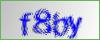

In [2]:
#识别验证码
from IPython.display import Image
Image(r'D:\000zyf\Learning\python_learn\spider\script\练习\UCAS教评_selenium\images\adminValidateImage1.jpg')